In [1]:
from windrose import WindroseAxes, WindAxes
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

import pandas as pd
from datetime import datetime, timedelta
import glob

import cmaps

%matplotlib inline

C:\Users\panmits86\Anaconda3\envs\thesis\lib\site-packages\windrose\windrose.py:29: MatplotlibDeprecationWarning: 
The Appender class was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  addendum = docstring.Appender(msg, "\n\n")
C:\Users\panmits86\Anaconda3\envs\thesis\lib\site-packages\windrose\windrose.py:30: MatplotlibDeprecationWarning: 
The copy_dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use docstring.copy() and cbook.dedent() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
C:\Users\panmits86\Anaconda3\envs\thesis\lib\site-packages\windrose\windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.getdoc() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
C:\Users\panmits86\Anaconda3\envs\thesis\lib\site-packages\windrose\windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in

# BUZM3 Station

In [2]:
# make a parser to include minutes, hours, days, months, years in one column and convert to datetime
def parse(yr, mo, doy, hr, min):
    yr, mo, doy, hr, min = [int(x) for x in [yr, mo, doy, hr, min]]
    dt = datetime(yr - 0, mo, doy, hr, min)
    return dt

In [3]:
#read all files for the 44040 buoy and concatenate them into one single pandas data frame and exclude wave height error values
path = r'C:/Users/panmits86/Desktop/Python/data/buoys/Station_BUZM3'
all_files = glob.glob(path + "/*.txt")

BUZM3_wind = pd.concat((pd.read_csv(f, delim_whitespace=True, 
                         skiprows=lambda x: x == 1, usecols=[0,1,2,3,4,5,6,7], header=0, date_parser=parse, 
                          parse_dates={'Date':['#YY','MM','DD','hh','mm']}) for f in all_files))
BUZM3_wind = BUZM3_wind[(BUZM3_wind.WSPD !=99) & (BUZM3_wind.WSPD > 0.0) & (BUZM3_wind.WDIR !=99)]
BUZM3_wind

,Date,WDIR,WSPD,GST
0,2005-01-01 00:00:00,200,8.1,8.3
1,2005-01-01 01:00:00,195,11.5,11.8
2,2005-01-01 02:00:00,193,12.1,12.7
3,2005-01-01 03:00:00,205,12.3,12.9
4,2005-01-01 04:00:00,219,12.7,13.4
...,...,...,...,...
690,2020-02-29 19:00:00,252,10.0,13.0
691,2020-02-29 20:00:00,252,11.2,12.6
692,2020-02-29 21:00:00,268,8.0,9.6
693,2020-02-29 22:00:00,308,8.6,9.3


In [4]:
# make a parser to include minutes, hours, days, months, years in one column and convert to datetime
def parse(yr, mo, doy, hr):
    yr, mo, doy, hr = [int(x) for x in [yr, mo, doy, hr]]
    dt = datetime(yr - 0, mo, doy, hr)
    return dt

In [5]:
#read all files for the 44040 buoy and concatenate them into one single pandas data frame and exclude wave height error values
path = r'C:/Users/panmits86/Desktop/Python/data/buoys/Station_BUZM3/1999-2004'
all_files = glob.glob(path + "/*.txt")

BUZM3_wind_1 = pd.concat((pd.read_csv(f, delim_whitespace=True, 
                        usecols=[0,1,2,3,4,5,6], header=0, date_parser=parse, 
                          parse_dates={'Date':['YYYY','MM','DD','hh']}) for f in all_files))
BUZM3_wind_1 = BUZM3_wind_1[(BUZM3_wind_1.WSPD !=99) & (BUZM3_wind_1.WSPD > 0.0) & (BUZM3_wind_1.WD !=99)]
BUZM3_wind_1 = BUZM3_wind_1.rename({"WD": "WDIR"}, axis='columns')
BUZM3_wind_1

,Date,WDIR,WSPD,GST
0,1999-01-01 00:00:00,275,5.0,6.3
1,1999-01-01 01:00:00,292,5.0,5.6
2,1999-01-01 02:00:00,309,5.8,6.4
3,1999-01-01 03:00:00,298,5.1,6.4
4,1999-01-01 04:00:00,292,4.6,5.9
...,...,...,...,...
8764,2004-12-31 19:00:00,179,7.2,7.6
8765,2004-12-31 20:00:00,176,9.4,10.0
8766,2004-12-31 21:00:00,174,10.2,10.8
8767,2004-12-31 22:00:00,181,9.3,9.9


In [6]:
merge = [BUZM3_wind_1, BUZM3_wind]
BUZM3_wind = pd.concat(merge)
BUZM3_wind

,Date,WDIR,WSPD,GST
0,1999-01-01 00:00:00,275,5.0,6.3
1,1999-01-01 01:00:00,292,5.0,5.6
2,1999-01-01 02:00:00,309,5.8,6.4
3,1999-01-01 03:00:00,298,5.1,6.4
4,1999-01-01 04:00:00,292,4.6,5.9
...,...,...,...,...
690,2020-02-29 19:00:00,252,10.0,13.0
691,2020-02-29 20:00:00,252,11.2,12.6
692,2020-02-29 21:00:00,268,8.0,9.6
693,2020-02-29 22:00:00,308,8.6,9.3


In [7]:
BUZM3_wind = BUZM3_wind.set_index('Date')
BUZM3_wind['u10'] = BUZM3_wind['WSPD']*np.sqrt((0.4**2)/0.0012)*(1/(np.log(24.8/0.000097)))

In [8]:
BUZM3_wind

,WDIR,WSPD,GST,u10
Date,,,,
1999-01-01 00:00:00,275,5.0,6.3,4.636740
1999-01-01 01:00:00,292,5.0,5.6,4.636740
1999-01-01 02:00:00,309,5.8,6.4,5.378618
1999-01-01 03:00:00,298,5.1,6.4,4.729474
1999-01-01 04:00:00,292,4.6,5.9,4.265800
...,...,...,...,...
2020-02-29 19:00:00,252,10.0,13.0,9.273479
2020-02-29 20:00:00,252,11.2,12.6,10.386297
2020-02-29 21:00:00,268,8.0,9.6,7.418783


In [9]:
BUZM3_wind.to_csv('BUZM3_99-20.txt', sep='\t', index=False)

In [10]:
wd = BUZM3_wind['WDIR']
ws = BUZM3_wind['u10']

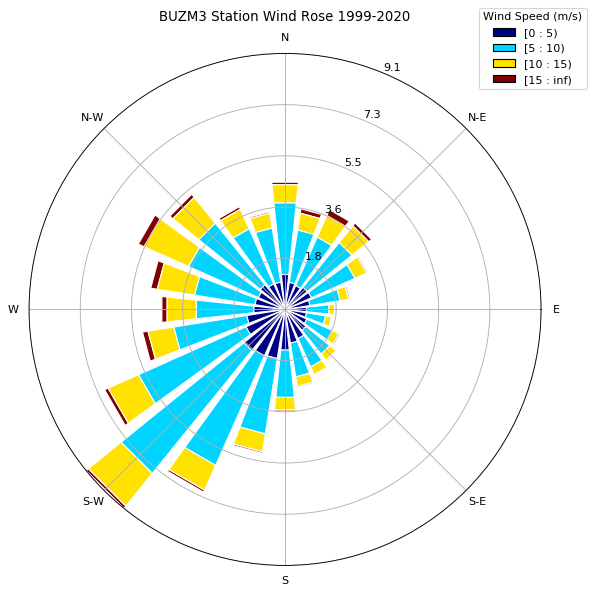

In [11]:
ax = WindroseAxes.from_ax()
cmap=cmaps.MPL_jet
ax.bar(wd, ws, bins=np.arange(0, 20, 5), normed=True, opening=0.8, edgecolor='white', nsector=24, cmap=cmap)
ax.legend(loc='best', decimal_places=0, title='Wind Speed (m/s)', bbox_to_anchor=(1.1, 1.1))
ax.set_title('BUZM3 Station Wind Rose 1999-2020',size=12)
plt.savefig('BUZM3_windrose', dpi=300, bbox_inches='tight')

## Seasonal

### Winter Months (December, January, February) 1999-2020

In [12]:
BUZM3_winter = BUZM3_wind[(BUZM3_wind.index.month!=3) & (BUZM3_wind.index.month!=4) & (BUZM3_wind.index.month!=5) & 
                          (BUZM3_wind.index.month!=6) & (BUZM3_wind.index.month!=7) & (BUZM3_wind.index.month!=8) &
                         (BUZM3_wind.index.month!=9) & (BUZM3_wind.index.month!=10) & (BUZM3_wind.index.month!=11)]
BUZM3_winter

,WDIR,WSPD,GST,u10
Date,,,,
1999-01-01 00:00:00,275,5.0,6.3,4.636740
1999-01-01 01:00:00,292,5.0,5.6,4.636740
1999-01-01 02:00:00,309,5.8,6.4,5.378618
1999-01-01 03:00:00,298,5.1,6.4,4.729474
1999-01-01 04:00:00,292,4.6,5.9,4.265800
...,...,...,...,...
2020-02-29 19:00:00,252,10.0,13.0,9.273479
2020-02-29 20:00:00,252,11.2,12.6,10.386297
2020-02-29 21:00:00,268,8.0,9.6,7.418783


In [13]:
wd_winter = BUZM3_winter['WDIR']
ws_winter = BUZM3_winter['u10']

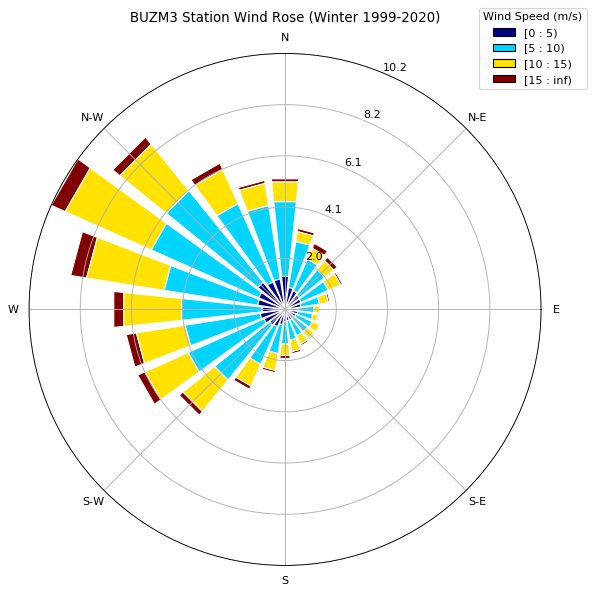

In [14]:
ax = WindroseAxes.from_ax()
cmap=cmaps.MPL_jet
ax.bar(wd_winter, ws_winter, bins=np.arange(0, 20, 5), normed=True, opening=0.8, edgecolor='white', nsector=24, cmap=cmap)
ax.legend(loc='best', decimal_places=0, title='Wind Speed (m/s)', bbox_to_anchor=(1.1, 1.1))
ax.set_title('BUZM3 Station Wind Rose (Winter 1999-2020)',size=12)
plt.savefig('BUZM3_windrose_winter', dpi=300, bbox_inches='tight')

### Spring Months (March, April, May) 1999-2019

In [15]:
BUZM3_spring = BUZM3_wind[(BUZM3_wind.index.month>=3) & (BUZM3_wind.index.month<=5)]
BUZM3_spring

,WDIR,WSPD,GST,u10
Date,,,,
1999-03-01 00:00:00,122,17.7,19.6,16.414058
1999-03-01 01:00:00,128,15.9,17.9,14.744832
1999-03-01 02:00:00,140,15.1,17.0,14.002954
1999-03-01 03:00:00,128,14.1,15.0,13.075606
1999-03-01 04:00:00,137,11.9,12.9,11.035440
...,...,...,...,...
2019-04-06 23:00:00,250,7.6,8.0,7.047844
2019-04-07 00:00:00,272,8.8,9.1,8.160662
2019-04-07 01:00:00,306,6.4,6.6,5.935027


In [16]:
wd_spring = BUZM3_spring['WDIR']
ws_spring = BUZM3_spring['u10']

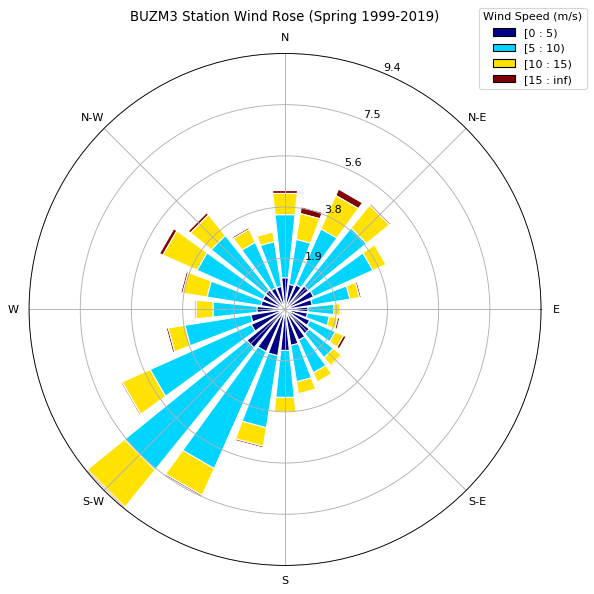

In [17]:
ax = WindroseAxes.from_ax()
cmap=cmaps.MPL_jet
ax.bar(wd_spring, ws_spring, bins=np.arange(0, 20, 5), normed=True, opening=0.8, edgecolor='white', nsector=24, cmap=cmap)
ax.legend(loc='best', decimal_places=0, title='Wind Speed (m/s)', bbox_to_anchor=(1.1, 1.1))
ax.set_title('BUZM3 Station Wind Rose (Spring 1999-2019)',size=12)
plt.savefig('BUZM3_windrose_spring', dpi=300, bbox_inches='tight')

### Summer Months (June, July, August) 1999-2019

In [18]:
BUZM3_summer = BUZM3_wind[(BUZM3_wind.index.month>=6) & (BUZM3_wind.index.month<=8)]
BUZM3_summer

,WDIR,WSPD,GST,u10
Date,,,,
1999-06-01 00:00:00,193,2.8,2.8,2.596574
1999-06-01 01:00:00,171,3.3,3.4,3.060248
1999-06-01 02:00:00,167,5.3,5.4,4.914944
1999-06-01 03:00:00,178,5.5,5.6,5.100414
1999-06-01 04:00:00,204,2.7,2.8,2.503839
...,...,...,...,...
2019-08-31 19:00:00,229,5.4,5.8,5.007679
2019-08-31 20:00:00,241,4.7,5.4,4.358535
2019-08-31 21:00:00,238,4.7,4.9,4.358535


In [19]:
wd_summer = BUZM3_summer['WDIR']
ws_summer = BUZM3_summer['u10']

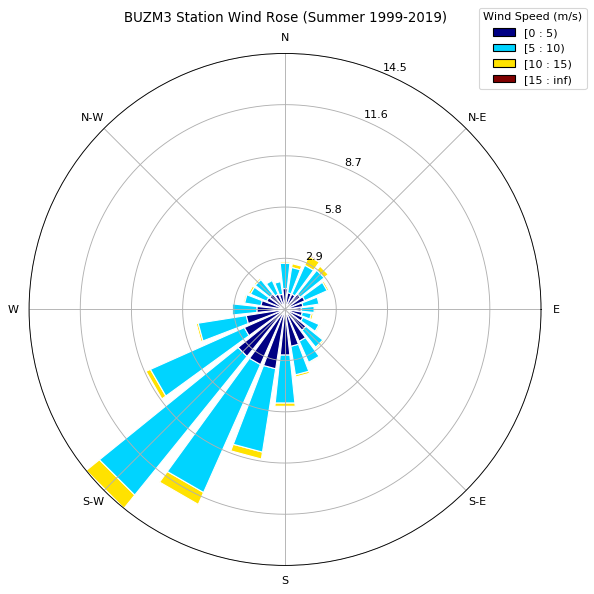

In [20]:
ax = WindroseAxes.from_ax()
cmap=cmaps.MPL_jet
ax.bar(wd_summer, ws_summer, bins=np.arange(0, 20, 5), normed=True, opening=0.8, edgecolor='white', nsector=24, cmap=cmap)
ax.legend(loc='best', decimal_places=0, title='Wind Speed (m/s)', bbox_to_anchor=(1.1, 1.1))
ax.set_title('BUZM3 Station Wind Rose (Summer 1999-2019)',size=12)
plt.savefig('BUZM3_windrose_summer', dpi=300, bbox_inches='tight')

### Autumn Months (September, October, November) 1999-2019

In [21]:
BUZM3_autumn = BUZM3_wind[(BUZM3_wind.index.month>=9) & (BUZM3_wind.index.month<=11)]
BUZM3_autumn

,WDIR,WSPD,GST,u10
Date,,,,
1999-09-01 00:00:00,36,7.9,8.8,7.326049
1999-09-01 01:00:00,31,7.3,7.9,6.769640
1999-09-01 02:00:00,29,7.6,8.3,7.047844
1999-09-01 03:00:00,29,6.7,7.8,6.213231
1999-09-01 04:00:00,21,5.7,6.1,5.285883
...,...,...,...,...
2019-11-30 19:00:00,326,10.9,11.7,10.108092
2019-11-30 20:00:00,327,8.1,9.3,7.511518
2019-11-30 21:00:00,324,9.4,10.5,8.717070


In [22]:
wd_autumn = BUZM3_autumn['WDIR']
ws_autumn = BUZM3_autumn['u10']

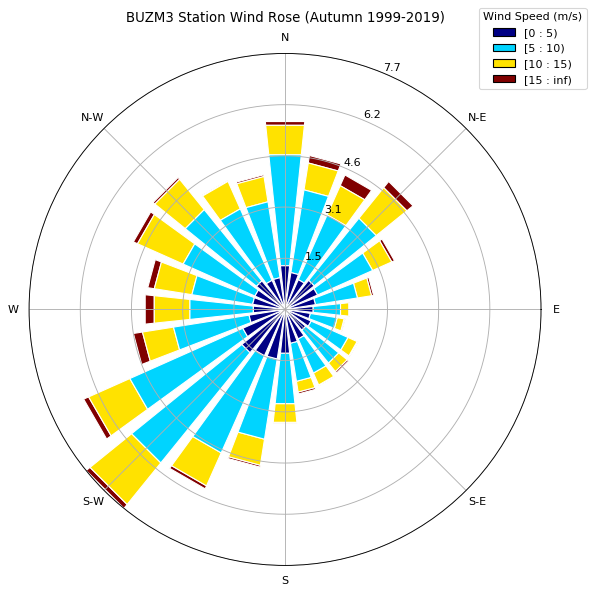

In [23]:
ax = WindroseAxes.from_ax()
cmap=cmaps.MPL_jet
ax.bar(wd_autumn, ws_autumn, bins=np.arange(0, 20, 5), normed=True, opening=0.8, edgecolor='white', nsector=24, cmap=cmap)
ax.legend(loc='best', decimal_places=0, title='Wind Speed (m/s)', bbox_to_anchor=(1.1, 1.1))
ax.set_title('BUZM3 Station Wind Rose (Autumn 1999-2019)',size=12)
plt.savefig('BUZM3_windrose_autumn', dpi=300, bbox_inches='tight')

# Buoy 44097 (Block Island)

In [24]:
# make a parser to include minutes, hours, days, months, years in one column and convert to datetime
def parse(yr, mo, doy, hr, min):
    yr, mo, doy, hr, min = [int(x) for x in [yr, mo, doy, hr, min]]
    dt = datetime(yr - 0, mo, doy, hr, min)
    return dt

In [25]:
#read all files since 2016 for the 44097 buoy and concatenate them into one single pandas data frame and exclude wave height error values
path = r'C:/Users/panmits86/Desktop/Python/data/buoys/Station_44097'
all_files = glob.glob(path + "/*.txt")

b44097_wave = pd.concat((pd.read_csv(f, delim_whitespace=True, 
                         skiprows=lambda x: x == 1, usecols=[0,1,2,3,4,8,9,11], header=0, date_parser=parse, 
                          parse_dates={'Date':['#YY','MM','DD','hh','mm']}) for f in all_files))
b44097_wave = b44097_wave[(b44097_wave.WVHT !=99) & (b44097_wave.MWD !=99)]
b44097_wave.reset_index(inplace=True)
b44097_wave.drop('index', 1, inplace=True)
b44097_wave = b44097_wave.set_index('Date')
b44097_wave

,WVHT,DPD,MWD
Date,,,
2009-10-21 23:31:00,0.59,8.33,139
2009-10-22 00:01:00,0.65,8.33,139
2009-10-22 00:31:00,0.57,8.33,141
2009-10-22 01:01:00,0.55,5.88,173
2009-10-22 01:31:00,0.57,7.69,139
...,...,...,...
2020-02-29 21:30:00,1.45,7.69,197
2020-02-29 22:00:00,1.53,4.76,253
2020-02-29 22:30:00,1.51,6.25,215


In [26]:
wvd = b44097_wave['MWD']
wh = b44097_wave['WVHT']

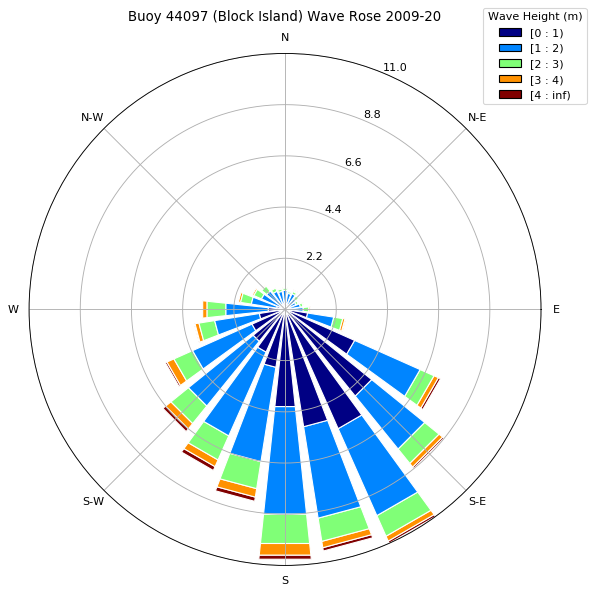

In [27]:
ax = WindroseAxes.from_ax()
cmap=cmaps.MPL_jet
ax.bar(wvd, wh, bins=np.arange(0, 5, 1), normed=True, opening=0.8, edgecolor='white', nsector=24, cmap=cmap)
ax.legend(loc='best', decimal_places=0, title='Wave Height (m)', bbox_to_anchor=(1.1, 1.1))
ax.set_title('Buoy 44097 (Block Island) Wave Rose 2009-20',size=12)
plt.savefig('BlockIsland_waverose', dpi=300, bbox_inches='tight')

# Seasonal

### Winter Months (December, January, February) 2009-2020

In [28]:
b44097_winter = b44097_wave[(b44097_wave .index.month!=3) & (b44097_wave.index.month!=4) & (b44097_wave.index.month!=5) & 
                          (b44097_wave.index.month!=6) & (b44097_wave.index.month!=7) & (b44097_wave.index.month!=8) &
                         (b44097_wave.index.month!=9) & (b44097_wave.index.month!=10) & (b44097_wave.index.month!=11)]
b44097_winter

,WVHT,DPD,MWD
Date,,,
2009-12-01 00:01:00,2.16,9.09,228
2009-12-01 00:31:00,2.08,8.33,226
2009-12-01 01:01:00,1.92,7.69,238
2009-12-01 01:31:00,2.01,9.09,224
2009-12-01 02:01:00,1.74,8.33,228
...,...,...,...
2020-02-29 21:30:00,1.45,7.69,197
2020-02-29 22:00:00,1.53,4.76,253
2020-02-29 22:30:00,1.51,6.25,215


In [29]:
wvd_winter = b44097_winter['MWD']
wh_winter = b44097_winter['WVHT']

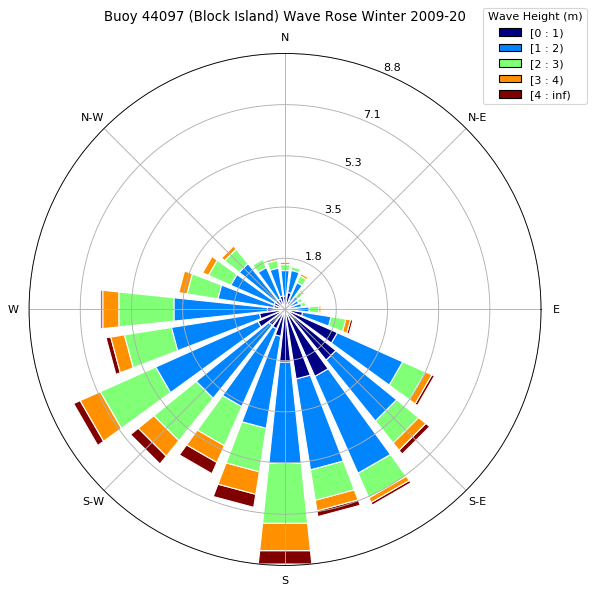

In [30]:
ax = WindroseAxes.from_ax()
cmap=cmaps.MPL_jet
ax.bar(wvd_winter, wh_winter, bins=np.arange(0, 5, 1), normed=True, opening=0.8, edgecolor='white', nsector=24, cmap=cmap)
ax.legend(loc='best', decimal_places=0, title='Wave Height (m)', bbox_to_anchor=(1.1, 1.1))
ax.set_title('Buoy 44097 (Block Island) Wave Rose Winter 2009-20',size=12)
plt.savefig('BlockIsland_waverose_winter', dpi=300, bbox_inches='tight')

### Spring Months (March, April, May) 2009-2019

In [31]:
b44097_spring = b44097_wave[(b44097_wave.index.month>=3) & (b44097_wave.index.month<=5)]
b44097_spring

,WVHT,DPD,MWD
Date,,,
2010-03-01 00:01:00,1.23,11.76,148
2010-03-01 00:31:00,1.26,10.53,152
2010-03-01 01:01:00,1.13,11.11,143
2010-03-01 01:31:00,1.24,11.76,141
2010-03-01 02:01:00,1.22,11.76,148
...,...,...,...
2019-05-31 21:30:00,0.66,5.26,198
2019-05-31 22:00:00,0.69,5.26,190
2019-05-31 22:30:00,0.71,5.00,201


In [32]:
wvd_spring = b44097_spring['MWD']
wh_spring = b44097_spring['WVHT']

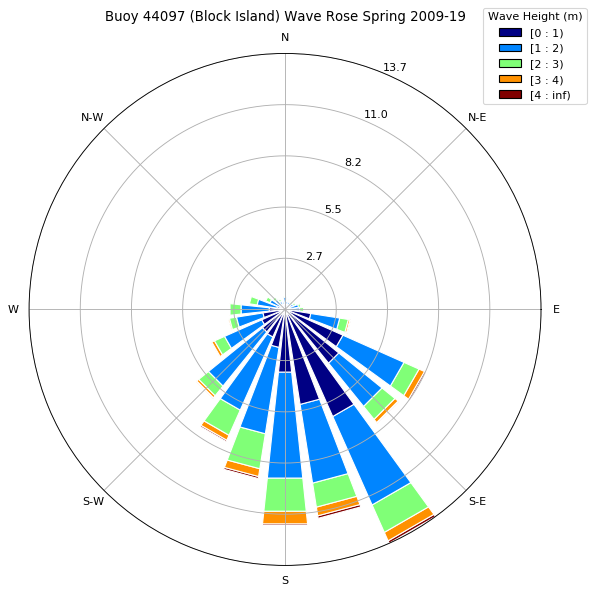

In [33]:
from windrose import WindAxes, WindroseAxes
ax = WindroseAxes.from_ax()
cmap=cmaps.MPL_jet
ax.bar(wvd_spring, wh_spring, bins=np.arange(0, 5, 1), normed=True, opening=0.8, edgecolor='white', nsector=24, cmap=cmap)
ax.legend(loc='best', decimal_places=0, title='Wave Height (m)', bbox_to_anchor=(1.1, 1.1))
ax.set_title('Buoy 44097 (Block Island) Wave Rose Spring 2009-19',size=12)
plt.savefig('BlockIsland_waverose_spring', dpi=300, bbox_inches='tight')

### Summer Months (June, July, August) 2009-2019

In [34]:
b44097_summer = b44097_wave[(b44097_wave.index.month>=6) & (b44097_wave.index.month<=8)]
b44097_summer

,WVHT,DPD,MWD
Date,,,
2010-06-01 00:01:00,0.77,6.67,218
2010-06-01 00:31:00,0.70,6.25,212
2010-06-01 01:01:00,0.76,6.25,219
2010-06-01 01:31:00,0.75,6.25,222
2010-06-01 02:01:00,0.73,6.25,219
...,...,...,...
2019-08-31 21:30:00,0.68,5.26,207
2019-08-31 22:00:00,0.67,5.56,203
2019-08-31 22:30:00,0.64,5.56,211


In [35]:
wvd_summer = b44097_summer['MWD']
wh_summer = b44097_summer['WVHT']

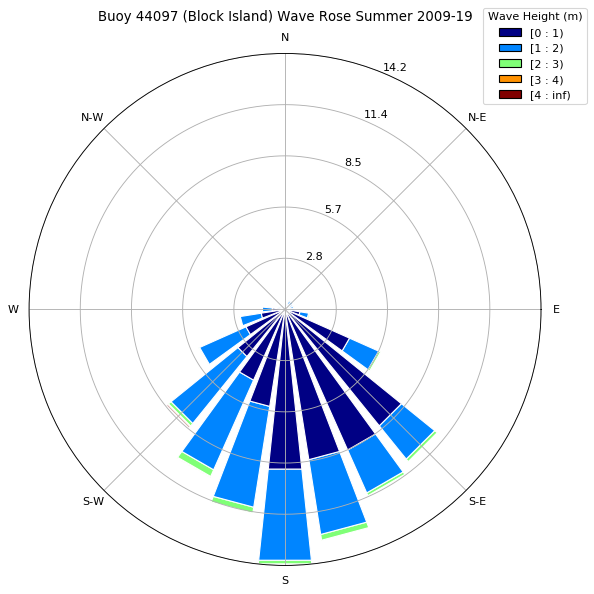

In [36]:
from windrose import WindAxes, WindroseAxes
ax = WindroseAxes.from_ax()
cmap=cmaps.MPL_jet
ax.bar(wvd_summer, wh_summer, bins=np.arange(0, 5, 1), normed=True, opening=0.8, edgecolor='white', nsector=24, cmap=cmap)
ax.legend(loc='best', decimal_places=0, title='Wave Height (m)', bbox_to_anchor=(1.1, 1.1))
ax.set_title('Buoy 44097 (Block Island) Wave Rose Summer 2009-19',size=12)
plt.savefig('BlockIsland_waverose_summer', dpi=300, bbox_inches='tight')

### Autumn Months (September, October, November) 2009-2019

In [37]:
b44097_autumn = b44097_wave[(b44097_wave.index.month>=9) & (b44097_wave.index.month<=11)]
b44097_autumn

,WVHT,DPD,MWD
Date,,,
2009-10-21 23:31:00,0.59,8.33,139
2009-10-22 00:01:00,0.65,8.33,139
2009-10-22 00:31:00,0.57,8.33,141
2009-10-22 01:01:00,0.55,5.88,173
2009-10-22 01:31:00,0.57,7.69,139
...,...,...,...
2019-11-30 21:30:00,1.35,4.76,314
2019-11-30 22:00:00,1.44,11.76,115
2019-11-30 22:30:00,1.27,11.76,113


In [38]:
wvd_autumn = b44097_autumn['MWD']
wh_autumn = b44097_autumn['WVHT']

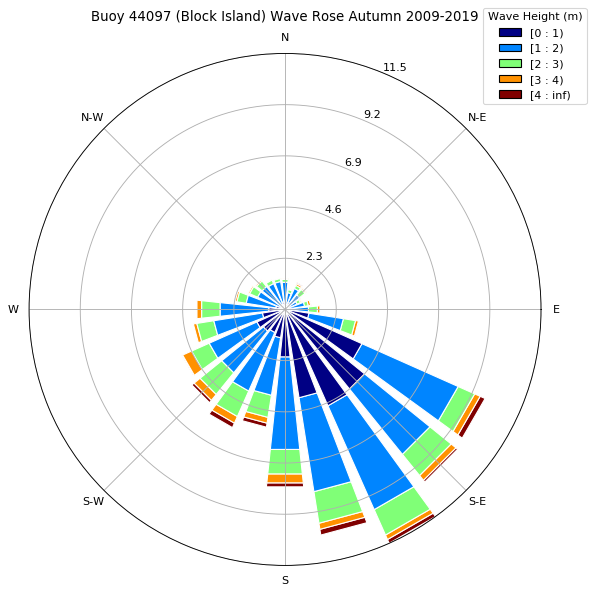

In [39]:
from windrose import WindAxes, WindroseAxes
ax = WindroseAxes.from_ax()
cmap=cmaps.MPL_jet
ax.bar(wvd_autumn, wh_autumn, bins=np.arange(0, 5, 1), normed=True, opening=0.8, edgecolor='white', nsector=24, cmap=cmap)
ax.legend(loc='best', decimal_places=0, title='Wave Height (m)', bbox_to_anchor=(1.1, 1.1))
ax.set_title('Buoy 44097 (Block Island) Wave Rose Autumn 2009-2019',size=12)
plt.savefig('BlockIsland_waverose_autumn', dpi=300, bbox_inches='tight')

# Buoy 44017 - Montauk Point

## Wind

In [40]:
# make a parser to include minutes, hours, days, months, years in one column and convert to datetime
def parse(yr, mo, doy, hr):
    yr, mo, doy, hr = [int(x) for x in [yr, mo, doy, hr]]
    dt = datetime(yr - 0, mo, doy, hr)
    return dt

In [41]:
#read all files for the 44040 buoy and concatenate them into one single pandas data frame and exclude wave height error values
path = r'C:/Users/panmits86/Desktop/Python/data/buoys/Station_44017/2002-2004'
all_files = glob.glob(path + "/*.txt")

b44017_wind_1 = pd.concat((pd.read_csv(f, delim_whitespace=True, 
                        usecols=[0,1,2,3,4,5,6], header=0, date_parser=parse, 
                          parse_dates={'Date':['YYYY','MM','DD','hh']}) for f in all_files))
b44017_wind_1 = b44017_wind_1[(b44017_wind_1.WSPD !=99.) & (b44017_wind_1.WSPD > 0.0) & (b44017_wind_1.WD !=99) & (b44017_wind_1.WD !=999)]
b44017_wind_1 = b44017_wind_1.rename({"WD": "WDIR"}, axis='columns')
b44017_wind_1

,Date,WDIR,WSPD,GST
0,2002-09-01 00:00:00,29,1.7,4.2
1,2002-09-01 01:00:00,19,2.0,4.3
2,2002-09-01 02:00:00,10,1.6,2.9
3,2002-09-01 03:00:00,8,1.3,2.4
4,2002-09-01 04:00:00,6,1.3,2.5
...,...,...,...,...
8075,2004-12-31 19:00:00,189,6.0,6.9
8076,2004-12-31 20:00:00,176,5.8,6.5
8077,2004-12-31 21:00:00,189,6.0,7.1
8078,2004-12-31 22:00:00,190,6.0,6.7


In [42]:
# make a parser to include minutes, hours, days, months, years in one column and convert to datetime
def parse(yr, mo, doy, hr, min):
    yr, mo, doy, hr, min = [int(x) for x in [yr, mo, doy, hr, min]]
    dt = datetime(yr - 0, mo, doy, hr, min)
    return dt

In [43]:
#read all files for the 44040 buoy and concatenate them into one single pandas data frame and exclude wave height error values
path = r'C:/Users/panmits86/Desktop/Python/data/buoys/Station_44017'
all_files = glob.glob(path + "/*.txt")

b44017_wind = pd.concat((pd.read_csv(f, delim_whitespace=True, 
                         skiprows=lambda x: x == 1, usecols=[0,1,2,3,4,5,6,7], header=0, date_parser=parse, 
                          parse_dates={'Date':['#YY','MM','DD','hh','mm']}) for f in all_files))
b44017_wind = b44017_wind[(b44017_wind.WSPD !=99) & (b44017_wind.WSPD > 0.0) & (b44017_wind.WDIR !=99) & (b44017_wind.WDIR !=999)]
b44017_wind

,Date,WDIR,WSPD,GST
0,2005-01-01 01:00:00,204,8.0,9.1
1,2005-01-01 02:00:00,205,8.5,10.0
2,2005-01-01 03:00:00,214,9.1,10.5
3,2005-01-01 04:00:00,223,9.4,11.5
4,2005-01-01 05:00:00,229,10.0,12.2
...,...,...,...,...
3223,2019-08-23 10:40:00,359,5.8,7.7
3224,2019-08-23 10:50:00,16,6.7,9.4
3225,2019-08-23 11:00:00,9,6.8,8.5
3226,2019-08-23 11:10:00,6,7.3,9.2


In [44]:
merge = [b44017_wind_1, b44017_wind]
b44017_wind = pd.concat(merge)
b44017_wind

,Date,WDIR,WSPD,GST
0,2002-09-01 00:00:00,29,1.7,4.2
1,2002-09-01 01:00:00,19,2.0,4.3
2,2002-09-01 02:00:00,10,1.6,2.9
3,2002-09-01 03:00:00,8,1.3,2.4
4,2002-09-01 04:00:00,6,1.3,2.5
...,...,...,...,...
3223,2019-08-23 10:40:00,359,5.8,7.7
3224,2019-08-23 10:50:00,16,6.7,9.4
3225,2019-08-23 11:00:00,9,6.8,8.5
3226,2019-08-23 11:10:00,6,7.3,9.2


In [45]:
b44017_wind = b44017_wind.set_index('Date')
b44017_wind['u10'] = b44017_wind['WSPD']*np.sqrt((0.4**2)/0.0012)*(1/(np.log(4.1/0.000097)))

In [46]:
b44017_wind

,WDIR,WSPD,GST,u10
Date,,,,
2002-09-01 00:00:00,29,1.7,4.2,1.842875
2002-09-01 01:00:00,19,2.0,4.3,2.168088
2002-09-01 02:00:00,10,1.6,2.9,1.734470
2002-09-01 03:00:00,8,1.3,2.4,1.409257
2002-09-01 04:00:00,6,1.3,2.5,1.409257
...,...,...,...,...
2019-08-23 10:40:00,359,5.8,7.7,6.287455
2019-08-23 10:50:00,16,6.7,9.4,7.263095
2019-08-23 11:00:00,9,6.8,8.5,7.371499


In [47]:
b44017_wd = b44017_wind['WDIR']
b44017_ws = b44017_wind['u10']

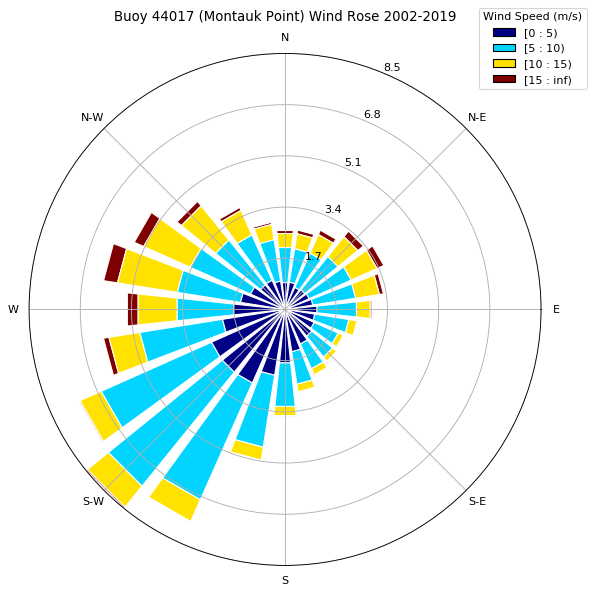

In [48]:
ax = WindroseAxes.from_ax()
cmap=cmaps.MPL_jet
ax.bar(b44017_wd, b44017_ws, bins=np.arange(0, 20, 5), normed=True, opening=0.8, edgecolor='white', nsector=24, cmap=cmap)
ax.legend(loc='best', decimal_places=0, title='Wind Speed (m/s)', bbox_to_anchor=(1.1, 1.1))
ax.set_title('Buoy 44017 (Montauk Point) Wind Rose 2002-2019',size=12)
plt.savefig('b44017_windrose', dpi=300, bbox_inches='tight')

## Wave

In [49]:
# make a parser to include minutes, hours, days, months, years in one column and convert to datetime
def parse(yr, mo, doy, hr, min):
    yr, mo, doy, hr, min = [int(x) for x in [yr, mo, doy, hr, min]]
    dt = datetime(yr - 0, mo, doy, hr, min)
    return dt

In [50]:
#read all files since 2016 for the 44097 buoy and concatenate them into one single pandas data frame and exclude wave height error values
path = r'C:/Users/panmits86/Desktop/Python/data/buoys/Station_44017'
all_files = glob.glob(path + "/*.txt")

b44017_wave = pd.concat((pd.read_csv(f, delim_whitespace=True, 
                         skiprows=lambda x: x == 1, usecols=[0,1,2,3,4,8,9,11], header=0, date_parser=parse, 
                          parse_dates={'Date':['#YY','MM','DD','hh','mm']}) for f in all_files))
b44017_wave = b44017_wave[(b44017_wave.WVHT !=99) & (b44017_wave.MWD !=99) & (b44017_wave.MWD !=999)]
b44017_wave.reset_index(inplace=True)
b44017_wave.drop('index', 1, inplace=True)
b44017_wave = b44017_wave.set_index('Date')
b44017_wave

,WVHT,DPD,MWD
Date,,,
2008-04-30 20:50:00,1.09,9.09,143
2008-04-30 21:50:00,1.07,10.00,108
2008-04-30 22:50:00,0.96,8.33,149
2008-04-30 23:50:00,0.89,9.09,116
2008-05-01 00:50:00,1.01,8.33,169
...,...,...,...
2019-08-23 06:40:00,1.37,7.69,189
2019-08-23 07:40:00,1.36,7.69,191
2019-08-23 08:40:00,1.38,7.14,188


In [51]:
b44017_wvd = b44017_wave['MWD']
b44017_wh = b44017_wave['WVHT']

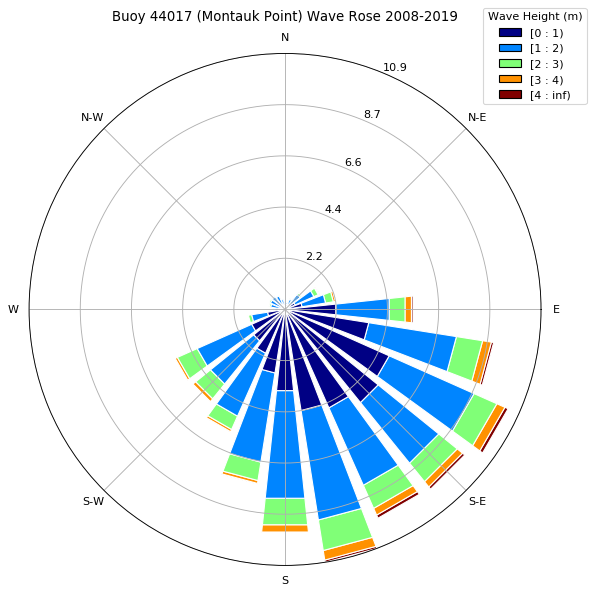

In [52]:
ax = WindroseAxes.from_ax()
cmap=cmaps.MPL_jet
ax.bar(b44017_wvd, b44017_wh, bins=np.arange(0, 5, 1), normed=True, opening=0.8, edgecolor='white', nsector=24, cmap=cmap)
ax.legend(loc='best', decimal_places=0, title='Wave Height (m)', bbox_to_anchor=(1.1, 1.1))
ax.set_title('Buoy 44017 (Montauk Point) Wave Rose 2008-2019',size=12)
plt.savefig('b44017_waverose', dpi=300, bbox_inches='tight')

## Seasonal (Wind)

### Winter Months (December, January, February) 2002-2019

In [53]:
b44017_wind_winter = b44017_wind[(b44017_wind.index.month!=3) & (b44017_wind.index.month!=4) & (b44017_wind.index.month!=5) & 
                          (b44017_wind.index.month!=6) & (b44017_wind.index.month!=7) & (b44017_wind.index.month!=8) &
                         (b44017_wind.index.month!=9) & (b44017_wind.index.month!=10) & (b44017_wind.index.month!=11)]
b44017_wind_winter

,WDIR,WSPD,GST,u10
Date,,,,
2002-12-01 00:00:00,255,8.1,10.1,8.780756
2002-12-01 01:00:00,258,11.6,14.2,12.574910
2002-12-01 02:00:00,271,13.3,15.9,14.417785
2002-12-01 03:00:00,271,13.2,15.7,14.309381
2002-12-01 04:00:00,278,13.3,16.3,14.417785
...,...,...,...,...
2019-02-28 19:50:00,5,5.8,8.8,6.287455
2019-02-28 20:50:00,1,4.9,6.8,5.311816
2019-02-28 21:50:00,343,4.8,6.4,5.203411


In [54]:
b44017_wd_winter = b44017_wind_winter['WDIR']
b44017_ws_winter = b44017_wind_winter['u10']

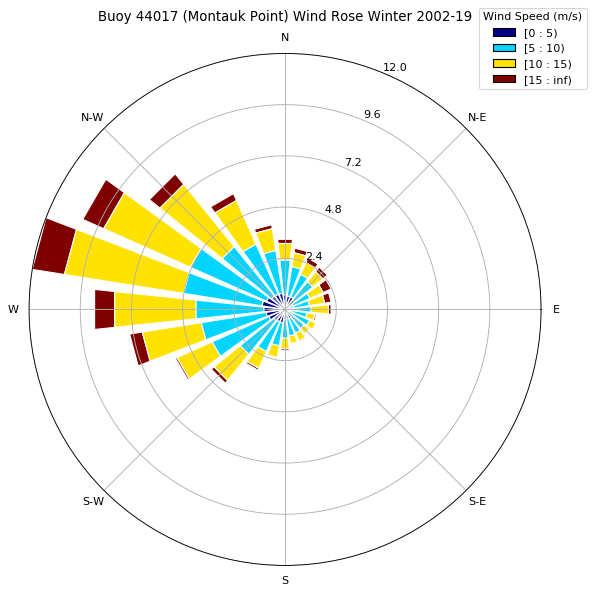

In [55]:
ax = WindroseAxes.from_ax()
cmap=cmaps.MPL_jet
ax.bar(b44017_wd_winter, b44017_ws_winter, bins=np.arange(0, 20, 5), normed=True, opening=0.8, edgecolor='white', nsector=24, cmap=cmap)
ax.legend(loc='best', decimal_places=0, title='Wind Speed (m/s)', bbox_to_anchor=(1.1, 1.1))
ax.set_title('Buoy 44017 (Montauk Point) Wind Rose Winter 2002-19',size=12)
plt.savefig('b44017_windrose_winter', dpi=300, bbox_inches='tight')

### Spring Months (March, April, May) 2003-2019

In [56]:
b44017_wind_spring = b44017_wind[(b44017_wind.index.month>=3) & (b44017_wind.index.month<=5)]
b44017_wind_spring

,WDIR,WSPD,GST,u10
Date,,,,
2003-03-01 00:00:00,14,4.8,6.3,5.203411
2003-03-01 01:00:00,25,4.5,5.7,4.878198
2003-03-01 02:00:00,15,3.8,5.2,4.119367
2003-03-01 03:00:00,53,1.8,2.9,1.951279
2003-03-01 04:00:00,36,1.0,2.3,1.084044
...,...,...,...,...
2019-05-31 23:10:00,216,4.9,5.4,5.311816
2019-05-31 23:20:00,212,4.4,5.0,4.769794
2019-05-31 23:30:00,216,4.4,5.0,4.769794


In [57]:
b44017_wd_spring = b44017_wind_spring['WDIR']
b44017_ws_spring = b44017_wind_spring['u10']

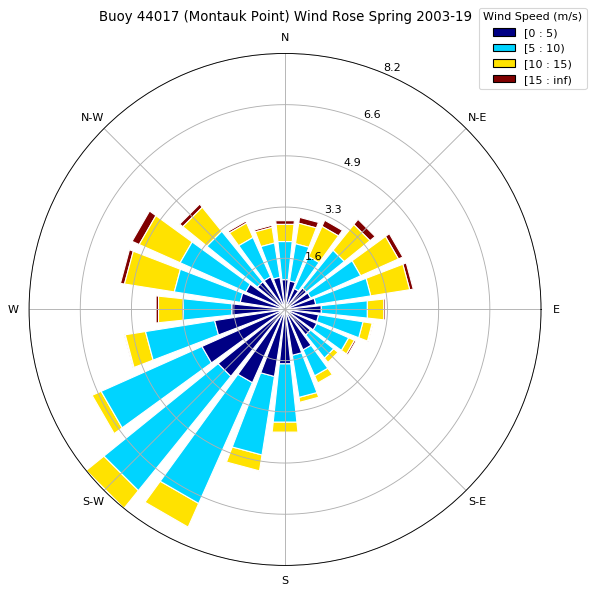

In [58]:
ax = WindroseAxes.from_ax()
cmap=cmaps.MPL_jet
ax.bar(b44017_wd_spring, b44017_ws_spring, bins=np.arange(0, 20, 5), normed=True, opening=0.8, edgecolor='white', nsector=24, cmap=cmap)
ax.legend(loc='best', decimal_places=0, title='Wind Speed (m/s)', bbox_to_anchor=(1.1, 1.1))
ax.set_title('Buoy 44017 (Montauk Point) Wind Rose Spring 2003-19',size=12)
plt.savefig('b44017_windrose_spring', dpi=300, bbox_inches='tight')

### Summer Months (June, July, August) 2003-2019

In [59]:
b44017_wind_summer = b44017_wind[(b44017_wind.index.month>=6) & (b44017_wind.index.month<=8)]
b44017_wind_summer

,WDIR,WSPD,GST,u10
Date,,,,
2003-06-01 00:00:00,58,2.4,3.0,2.601706
2003-06-01 01:00:00,69,4.0,4.6,4.336176
2003-06-01 02:00:00,139,5.6,7.0,6.070646
2003-06-01 03:00:00,129,7.0,8.1,7.588308
2003-06-01 04:00:00,122,7.9,9.2,8.563948
...,...,...,...,...
2019-08-23 10:40:00,359,5.8,7.7,6.287455
2019-08-23 10:50:00,16,6.7,9.4,7.263095
2019-08-23 11:00:00,9,6.8,8.5,7.371499


In [60]:
b44017_wd_summer = b44017_wind_summer['WDIR']
b44017_ws_summer = b44017_wind_summer['u10']

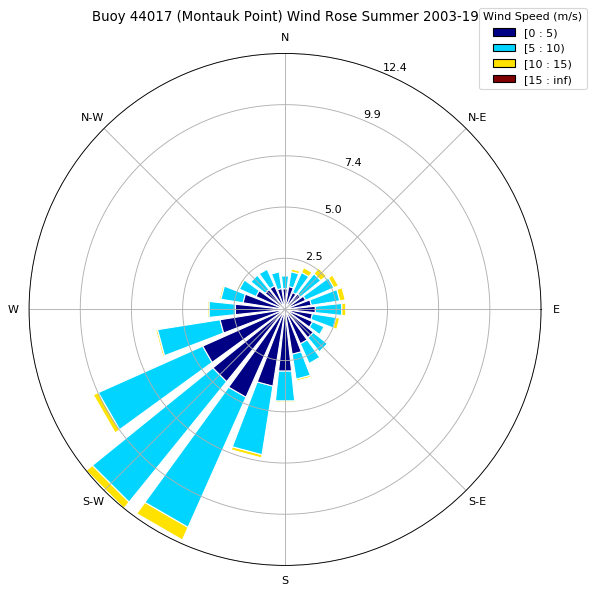

In [61]:
ax = WindroseAxes.from_ax()
cmap=cmaps.MPL_jet
ax.bar(b44017_wd_summer, b44017_ws_summer, bins=np.arange(0, 20, 5), normed=True, opening=0.8, edgecolor='white', nsector=24, cmap=cmap)
ax.legend(loc='best', decimal_places=0, title='Wind Speed (m/s)', bbox_to_anchor=(1.1, 1.1))
ax.set_title('Buoy 44017 (Montauk Point) Wind Rose Summer 2003-19',size=12)
plt.savefig('b44017_windrose_summer', dpi=300, bbox_inches='tight')

### Autumn Months (September, October, November) 2002-2018

In [62]:
b44017_wind_autumn = b44017_wind[(b44017_wind.index.month>=9) & (b44017_wind.index.month<=11)]
b44017_wind_autumn

,WDIR,WSPD,GST,u10
Date,,,,
2002-09-01 00:00:00,29,1.7,4.2,1.842875
2002-09-01 01:00:00,19,2.0,4.3,2.168088
2002-09-01 02:00:00,10,1.6,2.9,1.734470
2002-09-01 03:00:00,8,1.3,2.4,1.409257
2002-09-01 04:00:00,6,1.3,2.5,1.409257
...,...,...,...,...
2018-11-30 19:50:00,293,3.1,4.4,3.360536
2018-11-30 20:50:00,286,2.7,4.1,2.926919
2018-11-30 21:50:00,348,3.4,5.2,3.685750


In [63]:
b44017_wd_autumn = b44017_wind_autumn['WDIR']
b44017_ws_autumn = b44017_wind_autumn['u10']

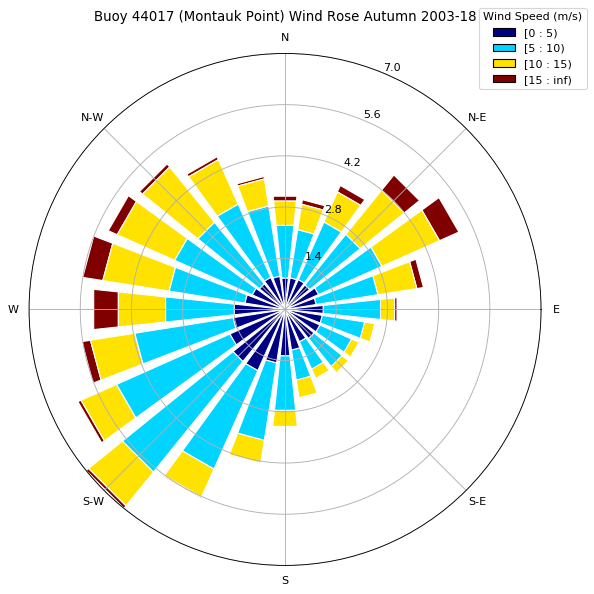

In [64]:
ax = WindroseAxes.from_ax()
cmap=cmaps.MPL_jet
ax.bar(b44017_wd_autumn, b44017_ws_autumn, bins=np.arange(0, 20, 5), normed=True, opening=0.8, edgecolor='white', nsector=24, cmap=cmap)
ax.legend(loc='best', decimal_places=0, title='Wind Speed (m/s)', bbox_to_anchor=(1.1, 1.1))
ax.set_title('Buoy 44017 (Montauk Point) Wind Rose Autumn 2003-18',size=12)
plt.savefig('b44017_windrose_autumn', dpi=300, bbox_inches='tight')

## Seasonal (Wave)

### Winter Months (December, January, February) 2008-2019

In [65]:
b44017_winter = b44017_wave[(b44017_wave .index.month!=3) & (b44017_wave.index.month!=4) & (b44017_wave.index.month!=5) & 
                          (b44017_wave.index.month!=6) & (b44017_wave.index.month!=7) & (b44017_wave.index.month!=8) &
                         (b44017_wave.index.month!=9) & (b44017_wave.index.month!=10) & (b44017_wave.index.month!=11)]
b44017_winter

,WVHT,DPD,MWD
Date,,,
2008-12-01 00:50:00,3.05,8.33,116
2008-12-01 01:50:00,3.22,7.69,107
2008-12-01 02:50:00,3.27,7.69,121
2008-12-01 03:50:00,3.19,7.69,118
2008-12-01 04:50:00,2.81,8.33,122
...,...,...,...
2019-02-28 19:50:00,0.83,4.35,62
2019-02-28 20:50:00,0.79,10.00,170
2019-02-28 21:50:00,0.85,10.00,164


In [66]:
b44017_wvd_winter = b44017_winter['MWD']
b44017_wh_winter = b44017_winter['WVHT']

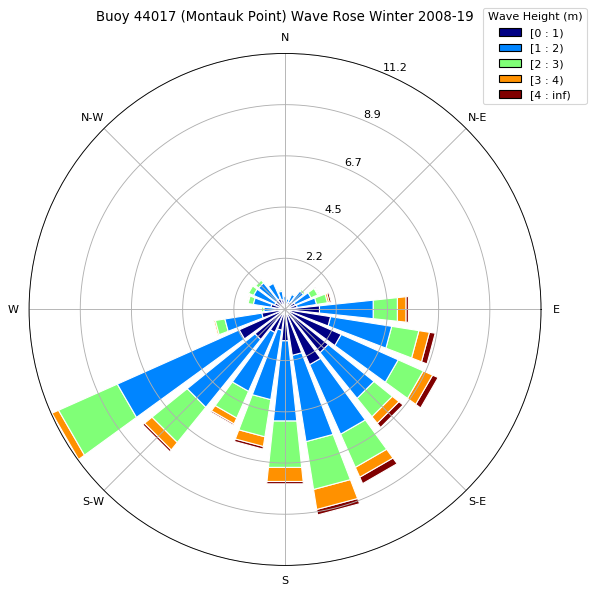

In [67]:
ax = WindroseAxes.from_ax()
cmap=cmaps.MPL_jet
ax.bar(b44017_wvd_winter, b44017_wh_winter, bins=np.arange(0, 5, 1), normed=True, opening=0.8, edgecolor='white', nsector=24, cmap=cmap)
ax.legend(loc='best', decimal_places=0, title='Wave Height (m)', bbox_to_anchor=(1.1, 1.1))
ax.set_title('Buoy 44017 (Montauk Point) Wave Rose Winter 2008-19',size=12)
plt.savefig('b44017_waverose_winter', dpi=300, bbox_inches='tight')

### Spring Months (March, April, May) 2008-2019

In [68]:
b44017_spring = b44017_wave[(b44017_wave.index.month>=3) & (b44017_wave.index.month<=5)]
b44017_spring

,WVHT,DPD,MWD
Date,,,
2008-04-30 20:50:00,1.09,9.09,143
2008-04-30 21:50:00,1.07,10.00,108
2008-04-30 22:50:00,0.96,8.33,149
2008-04-30 23:50:00,0.89,9.09,116
2008-05-01 00:50:00,1.01,8.33,169
...,...,...,...
2019-05-31 19:40:00,0.68,4.76,195
2019-05-31 20:40:00,0.68,5.26,196
2019-05-31 21:40:00,0.66,6.67,141


In [69]:
b44017_wvd_spring = b44017_spring['MWD']
b44017_wh_spring = b44017_spring['WVHT']

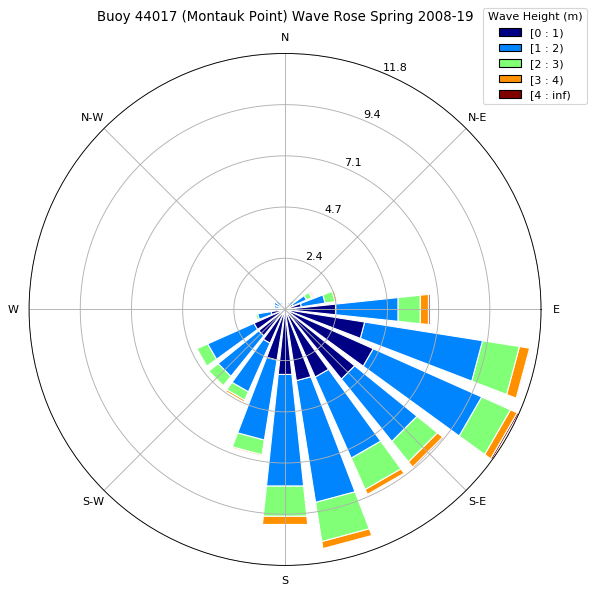

In [70]:
ax = WindroseAxes.from_ax()
cmap=cmaps.MPL_jet
ax.bar(b44017_wvd_spring, b44017_wh_spring, bins=np.arange(0, 5, 1), normed=True, opening=0.8, edgecolor='white', nsector=24, cmap=cmap)
ax.legend(loc='best', decimal_places=0, title='Wave Height (m)', bbox_to_anchor=(1.1, 1.1))
ax.set_title('Buoy 44017 (Montauk Point) Wave Rose Spring 2008-19',size=12)
plt.savefig('b44017_waverose_spring', dpi=300, bbox_inches='tight')

### Summer Months (June, July, August) 2008-2019

In [71]:
b44017_summer = b44017_wave[(b44017_wave.index.month>=6) & (b44017_wave.index.month<=8)]
b44017_summer

,WVHT,DPD,MWD
Date,,,
2008-06-01 00:50:00,2.32,7.14,207
2008-06-01 01:50:00,2.29,7.14,188
2008-06-01 02:50:00,1.97,7.69,189
2008-06-01 03:50:00,2.01,7.69,183
2008-06-01 04:50:00,2.09,7.69,185
...,...,...,...
2019-08-23 06:40:00,1.37,7.69,189
2019-08-23 07:40:00,1.36,7.69,191
2019-08-23 08:40:00,1.38,7.14,188


In [72]:
b44017_wvd_summer = b44017_summer['MWD']
b44017_wh_summer = b44017_summer['WVHT']

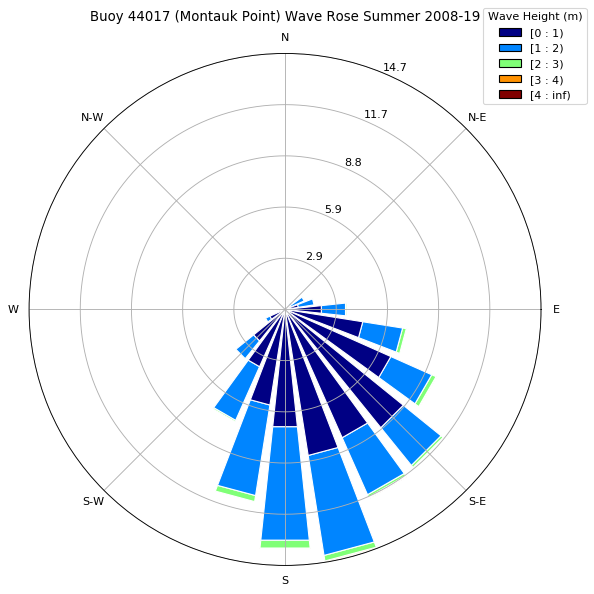

In [73]:
ax = WindroseAxes.from_ax()
cmap=cmaps.MPL_jet
ax.bar(b44017_wvd_summer, b44017_wh_summer, bins=np.arange(0, 5, 1), normed=True, opening=0.8, edgecolor='white', nsector=24, cmap=cmap)
ax.legend(loc='best', decimal_places=0, title='Wave Height (m)', bbox_to_anchor=(1.1, 1.1))
ax.set_title('Buoy 44017 (Montauk Point) Wave Rose Summer 2008-19',size=12)
plt.savefig('b44017_waverose_summer', dpi=300, bbox_inches='tight')

### Autumn Months (September, October, November) 2008-2018

In [74]:
b44017_autumn = b44017_wave[(b44017_wave.index.month>=9) & (b44017_wave.index.month<=11)]
b44017_autumn

,WVHT,DPD,MWD
Date,,,
2008-09-01 00:50:00,0.64,12.90,224
2008-09-01 01:50:00,0.74,13.79,127
2008-09-01 02:50:00,0.85,12.90,149
2008-09-01 03:50:00,0.79,12.90,135
2008-09-01 04:50:00,0.95,12.90,161
...,...,...,...
2018-11-30 19:50:00,0.62,12.12,82
2018-11-30 20:50:00,0.58,12.12,94
2018-11-30 21:50:00,0.57,11.43,117


In [75]:
b44017_wvd_autumn = b44017_autumn['MWD']
b44017_wh_autumn = b44017_autumn['WVHT']

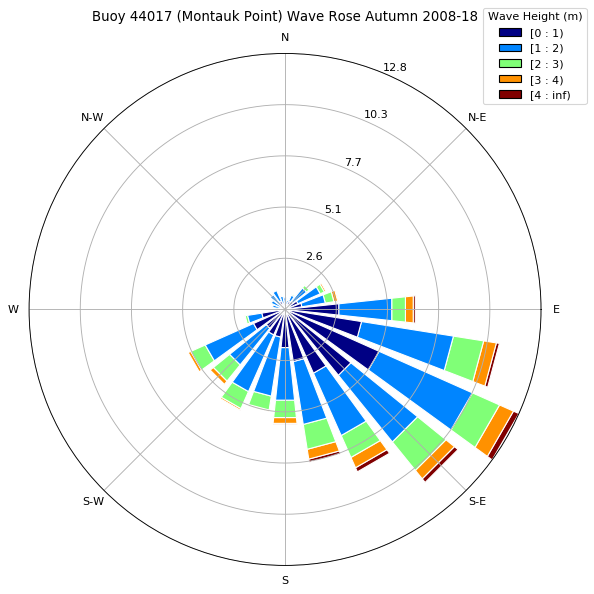

In [76]:
ax = WindroseAxes.from_ax()
cmap=cmaps.MPL_jet
ax.bar(b44017_wvd_autumn, b44017_wh_autumn, bins=np.arange(0, 5, 1), normed=True, opening=0.8, edgecolor='white', nsector=24, cmap=cmap)
ax.legend(loc='best', decimal_places=0, title='Wave Height (m)', bbox_to_anchor=(1.1, 1.1))
ax.set_title('Buoy 44017 (Montauk Point) Wave Rose Autumn 2008-18',size=12)
plt.savefig('b44017_waverose_autumn', dpi=300, bbox_inches='tight')